# MNIST 손글씨 숫자 예측


### 다음과 같은 ANN 을 만든다

이미지파일(28X28픽셀)이 입력으로 들어오면, 아웃풋으로는 0~9 까지의 10개 숫자로 분류하는 인공지능!

사진은 2차원 데이터이므로, 우리는 ANN의 입력에, 사진의 픽셀값을 flattening 하여 입력을 줄 것이다.

따라서 입력레이어는 784개, 히든1은 512, 히든2는 512, 아웃풋은 10개의 신경망 구축. 

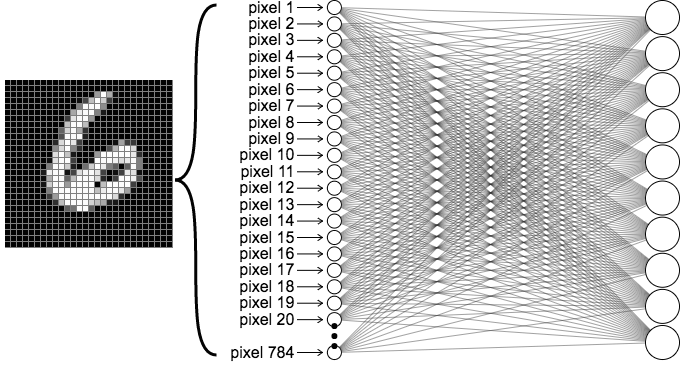

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
%matplotlib inline

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
# MNist 데이터를 가져온다. 이미 7만장의 손글씨 이미지 데이터가 있다. 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
img = X_train[0]

In [6]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

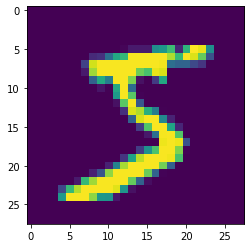

In [7]:
plt.imshow(img)

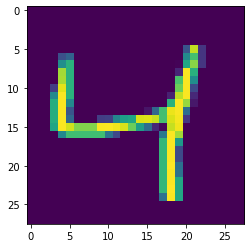

In [9]:
plt.imshow(X_train[2])

In [10]:
img2 = Image.fromarray(img)

In [11]:
img2.show()

In [16]:
# 1. 데이터를 딥러닝으로 처리하기 위해서, 행렬로 만들면서, 가로세로 값을 일렬로 만든다.

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train = X_train.reshape(60000, 28 * 28)

In [14]:
X_test = X_test.reshape(10000, 28 * 28)

In [15]:
X_train.shape

(60000, 784)

In [12]:
# 2. 데이터를 딥러닝에서 처리할 수 있도록 float로 바꿔준다.

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [18]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [14]:
# 3. 이미지라서, 숫자가 0~255 이므로, 0~1 사이로 정규화 시켜주자.

In [19]:
X_train /= 255   # X_train = X_train / 255

In [20]:
X_test /= 255

In [16]:
# 4. 분류의 문제이므로, y값을 확인하여, 카테고리컬 데이터를 원핫인코딩값으로 바꾼다.

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
y_train = np_utils.to_categorical(y_train, 10)

In [25]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
y_test = np_utils.to_categorical(y_test, 10)

In [21]:
# 5. 모델 만들기

In [27]:
classifier = Sequential()

W0908 16:13:21.039109  4760 deprecation_wrapper.py:119] From E:\Anaconda3\envs\ai\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



### 입력레이어는 784개, 히든1은 512, 히든2는 512, 아웃풋은 10개의 신경망 구축

In [28]:
classifier.add( Dense( input_dim = 784, output_dim = 512, init='uniform',
                     activation='relu')  )

E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=512, kernel_initializer="uniform")`
  
W0908 16:15:19.306563  4760 deprecation_wrapper.py:119] From E:\Anaconda3\envs\ai\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0908 16:15:19.327164  4760 deprecation_wrapper.py:119] From E:\Anaconda3\envs\ai\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [29]:
classifier.add( Dense( output_dim = 512, init='uniform',
                     activation='relu')  )

E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512, kernel_initializer="uniform")`
  


In [30]:
classifier.add( Dense( output_dim = 10, init='uniform',
                     activation='sigmoid')  )

E:\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10, kernel_initializer="uniform")`
  


In [27]:
# 5. 컴파일

In [31]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics = ['accuracy'])

W0908 16:18:06.047611  4760 deprecation_wrapper.py:119] From E:\Anaconda3\envs\ai\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0908 16:18:06.112812  4760 deprecation_wrapper.py:119] From E:\Anaconda3\envs\ai\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [29]:
# 6. 학습 

In [32]:
classifier.fit(X_train, y_train)

W0908 16:18:42.621361  4760 deprecation.py:323] From E:\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0908 16:18:42.668161  4760 deprecation_wrapper.py:119] From E:\Anaconda3\envs\ai\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1
60000/60000 [==============================] - 16s 261us/step - loss: 0.2140 - acc: 0.9356


In [31]:
# 7. 모델 평가.

In [33]:
score = classifier.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 47us/step


In [34]:
print('loss : ', score[0])
print('acc : ', score[1])

loss :  0.12747174190636723
acc :  0.9591


In [37]:
# 8. 그림판에서 내가 숫자를 손으로 적고, 모델에 에측해 보자.

In [35]:
from PIL import Image

In [36]:
img = Image.open("test7.png")

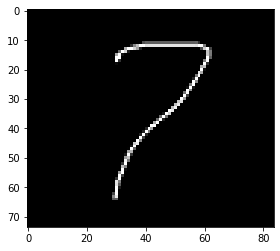

In [37]:
plt.imshow(img)

In [38]:
type(img)

PIL.PngImagePlugin.PngImageFile

In [39]:
num_img = np.array(img)

In [67]:
img = Image.open('test5.png').convert('L')
img_numpy = np.array(img, 'uint8')

In [68]:
img_numpy = img_numpy.astype(np.float)

In [69]:
img_numpy /= 255

In [70]:
img_numpy.shape

(28, 28)

In [71]:
img_numpy = img_numpy.reshape(1, 28*28)

In [72]:
img_numpy.shape

(1, 784)

In [73]:
img_numpy

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [74]:
y_pred = classifier.predict(img_numpy)

In [75]:
y_pred

array([[0.0000000e+00, 5.0663948e-06, 0.0000000e+00, 5.1929355e-03,
        0.0000000e+00, 7.9004872e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 4.3074374e-07]], dtype=float32)

In [76]:
y_pred.argmax()

5

### 선형대수학 참고 동영상

https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab